Distance        -0.370612
Body Battery    -0.185845
Sleep           -0.534792
stress           0.286137
Total Ascent     0.191176
Total Descent    0.192293
Temperature     -0.454025
Avg Pace         1.000000
Calories        -0.273291
Name: Avg Pace, dtype: float64


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


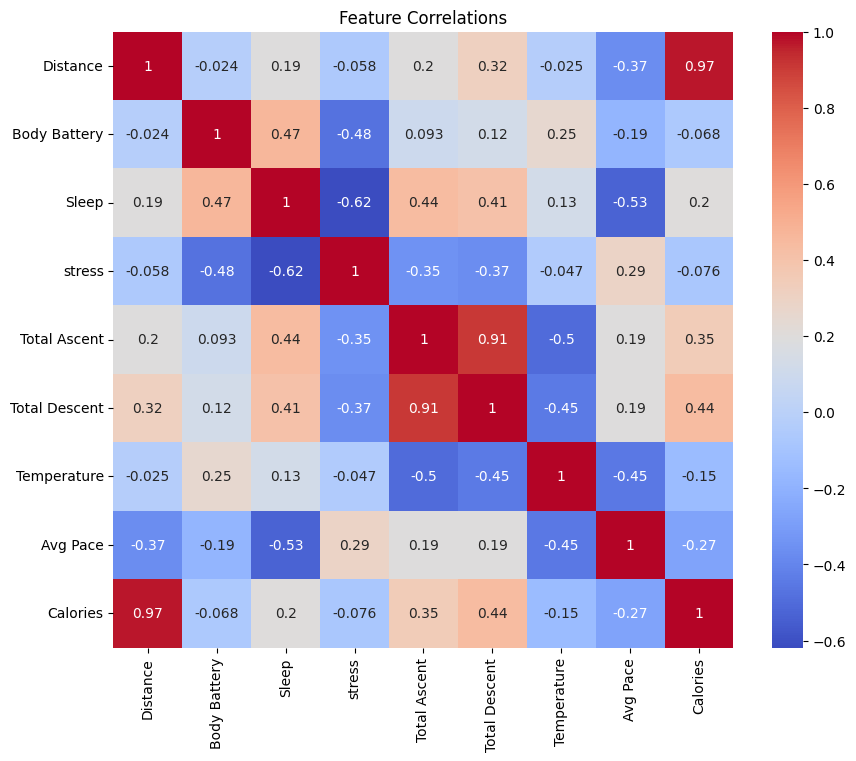

Distance        -0.388743
Body Battery    -0.221486
Sleep           -0.549833
stress           0.329924
Total Ascent     0.195870
Total Descent    0.166925
Temperature     -0.481465
Avg Pace         1.000000
Calories        -0.298696
Name: Avg Pace, dtype: float64


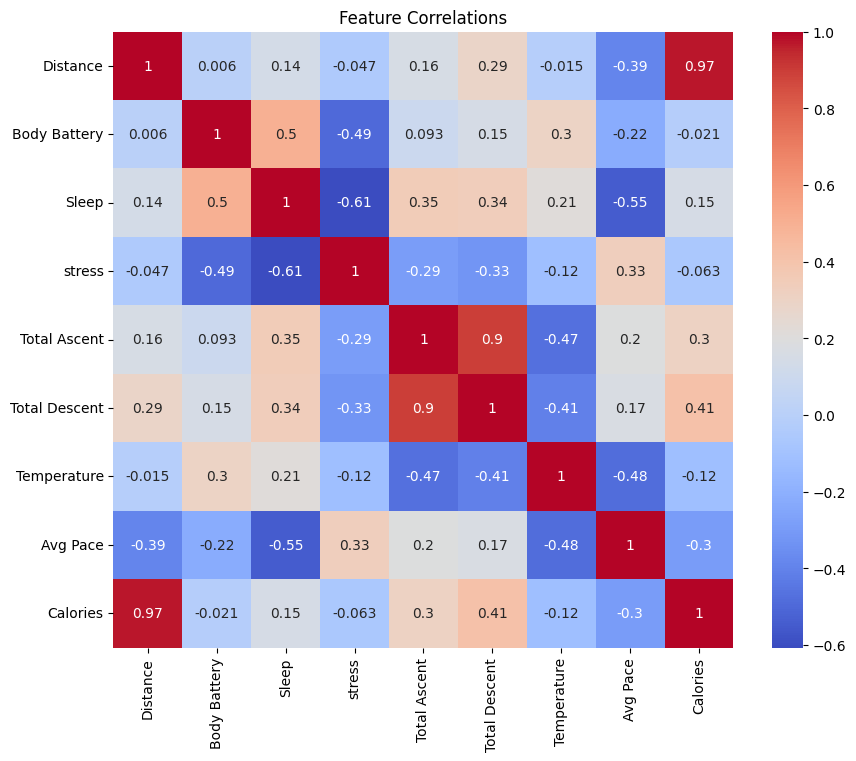

torch.Size([284, 7]) torch.Size([284, 2]) torch.Size([51, 7]) torch.Size([51, 2])
Loss: 0.0878
Loss: 0.3849
MSE: 0.3526
Loss: 0.0848
Loss: 0.1034
MSE: 0.1096
Loss: 0.0008
Loss: 0.0723
MSE: 0.0619
Loss: 0.0023
Loss: 0.0297
MSE: 0.0404
Loss: 0.0124
Loss: 0.0190
MSE: 0.0363
Loss: 0.0187
Loss: 0.0145
MSE: 0.0306
Loss: 0.0173
Loss: 0.0115
MSE: 0.0278
Loss: 0.0155
Loss: 0.0084
MSE: 0.0254
Loss: 0.0144
Loss: 0.0066
MSE: 0.0234
Loss: 0.0123
Loss: 0.0057
MSE: 0.0208
MSE: 0.02081424831675238


In [1]:
from preprocessing import preprocess
from train import train_model
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import torch
import joblib
import matplotlib.pyplot as plt

df = pd.read_csv("../data/Activities-6-2-2.csv")
X_train, X_test, y_train, y_test = preprocess(df)
model, mse, losses = train_model(X_train, y_train, X_test, y_test)

print("MSE:", mse)

Text(0.5, 1.0, 'Training Loss')

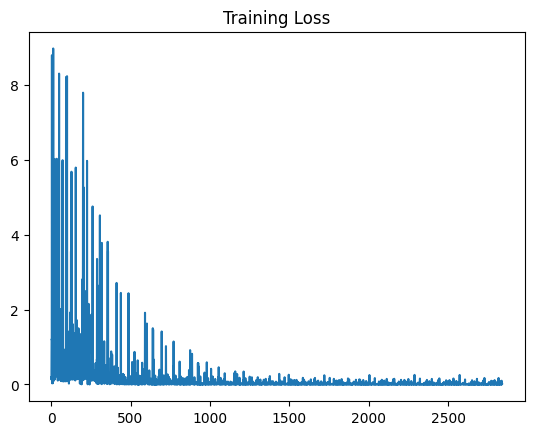

In [2]:
plt.plot(losses)
plt.title("Training Loss")

In [4]:
model.eval()

# Prepare new input
X_new = np.array([[5, 30, 470, 30, 100, 100, 30]])
scaler_X = joblib.load("scaler_X.save")
scaler_y = joblib.load("scaler_y.save")

X_new_scaled = scaler_X.transform(X_new)
X_new_tensor = torch.tensor(X_new_scaled, dtype=torch.float32)

# Predict
with torch.no_grad():
    y_pred = model(X_new_tensor).numpy()
    y_new = scaler_y.inverse_transform(y_pred)

print("Predicted:", y_new)

Predicted: [[363.73236 390.62286]]


In [7]:
from map import geocode_address
from geopy.geocoders import Nominatim

lon, lat = geocode_address("Bischofstraße 15, Aachen, Germany")

In [8]:
from dotenv import load_dotenv
import os

load_dotenv()  # load .env file

ORS_API_KEY = os.environ["ORS_API_KEY"]
print(ORS_API_KEY)

eyJvcmciOiI1YjNjZTM1OTc4NTExMTAwMDFjZjYyNDgiLCJpZCI6IjEzNWMxYTFkMTA1YjRmMTM4NjVlNzM3OTZhOGQwMTgyIiwiaCI6Im11cm11cjY0In0=


In [10]:
from map import route_plan

coordinates, m = route_plan(ORS_API_KEY, lon, lat, 6)
m

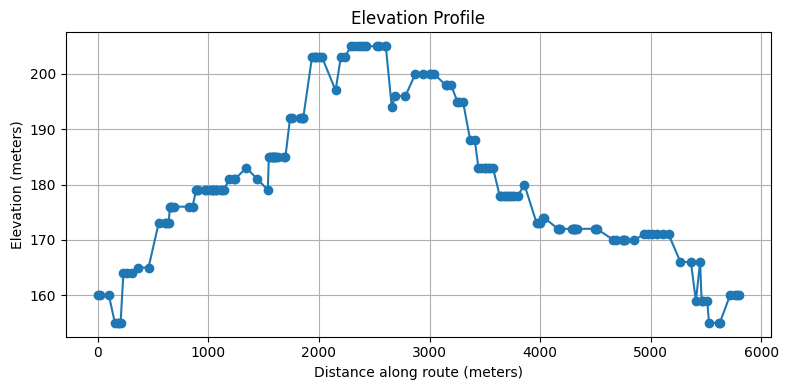

In [11]:
from map import elevation
import matplotlib.pyplot as plt

elevations, distances = elevation(coordinates)
# Plot
plt.figure(figsize=(8, 4))
plt.plot(distances, elevations, marker="o")
plt.xlabel("Distance along route (meters)")
plt.ylabel("Elevation (meters)")
plt.title("Elevation Profile")
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
from map import des_asc

total_ascent, total_descent = des_asc(elevations)
print("Total ascent:", total_ascent)
print("Total descent:", total_descent)

Total ascent: 82.0
Total descent: 82.0
